In [30]:
import cv2
import torch
from PIL import Image

# YOLOv5モデルのロード
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

def process_frame(frame):
    # フレームをPILイメージに変換
    img = Image.fromarray(frame)

    # YOLOv5で予測
    results = model(img)

    # 人間のクラスIDを取得（YOLOv5の場合、0が人間）
    person_class_id = 0

    for *box, conf, cls in results.xyxy[0]:
        if int(cls) == person_class_id:
            x1, y1, x2, y2 = map(int, box)
            label = f'Person {conf:.2f}'
            # bboxの描画
            cv2.rectangle(frame, (x1, y1-5), (x2, y2), (0, 255, 0), 1)
            # 信頼度の描画
            cv2.putText(frame, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    return frame

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-6-5 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [34]:
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/2025/ゼミ/img01.jpg")

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


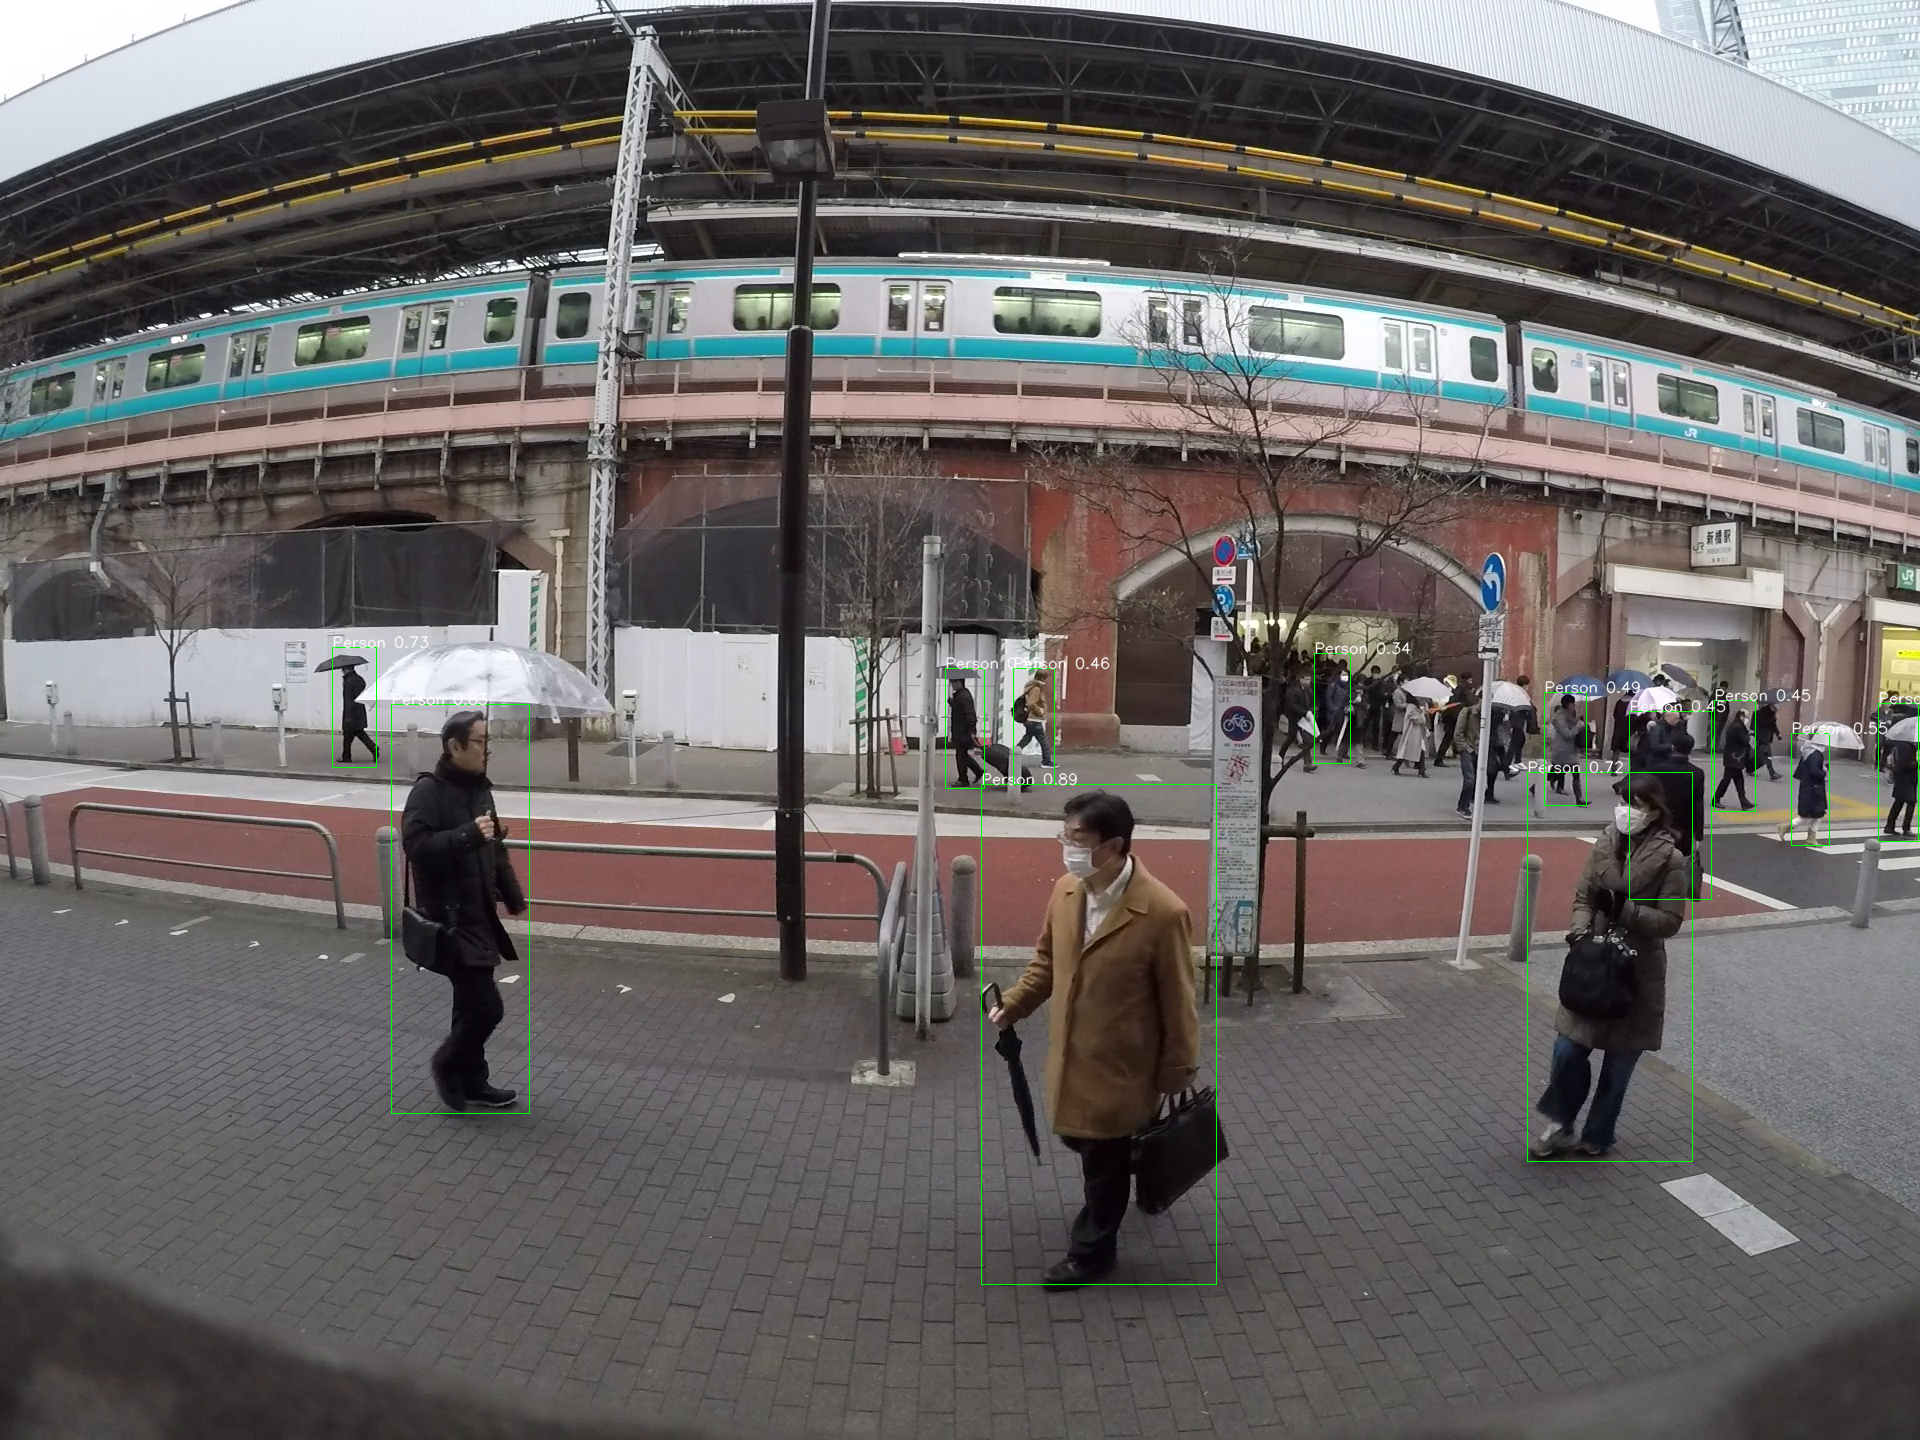

In [36]:
# frame = cv2.resize(image, (800, 600))

# YOLOv5で人物領域を検出
frame_alpha = process_frame(image)

cv2_imshow(frame_alpha)